Deep Learning Module: Neural Networks

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import seaborn as sns
import isbnlib
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from progressbar import ProgressBar
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import goodreads_api_client as gr
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'isbnlib'

In [17]:
books_df = pd.read_csv('/Users/mehrunisaqayyum/Downloads/books 3.csv', error_bad_lines = False)
books_df

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [19]:
books_df.index = books_df['bookID']


Columns Description:
1. bookID Contains the unique ID for each book/series
2. title contains the titles of the books
3. authors contains the author of the particular book
4. average_rating the average rating of the books, as decided by the users
5. ISBN ISBN(10) number, tells the information about a book - such as edition and publisher
6. ISBN 13 The new format for ISBN, implemented in 2007. 13 digits
7. language_code Tells the language for the books
8. Num_pages Contains the number of pages for the book
9. Ratings_count Contains the number of ratings given for the book
10. text_reviews_count Has the count of reviews left by users

In [20]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(books_df.shape[0], books_df.shape[1]))

Dataset contains 11123 rows and 12 columns


## Exploratory Data Analysis

In [23]:
books_df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [24]:
#Convert 'publication_date' to float
#Artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
books_df['publication_date'] = pd.to_datetime(books_df.publication_date)

ValueError: day is out of range for month

#### We see that 'title', 'authors', 'isbn', 'language_code', 'publication_date', and 'publisher' are objects.

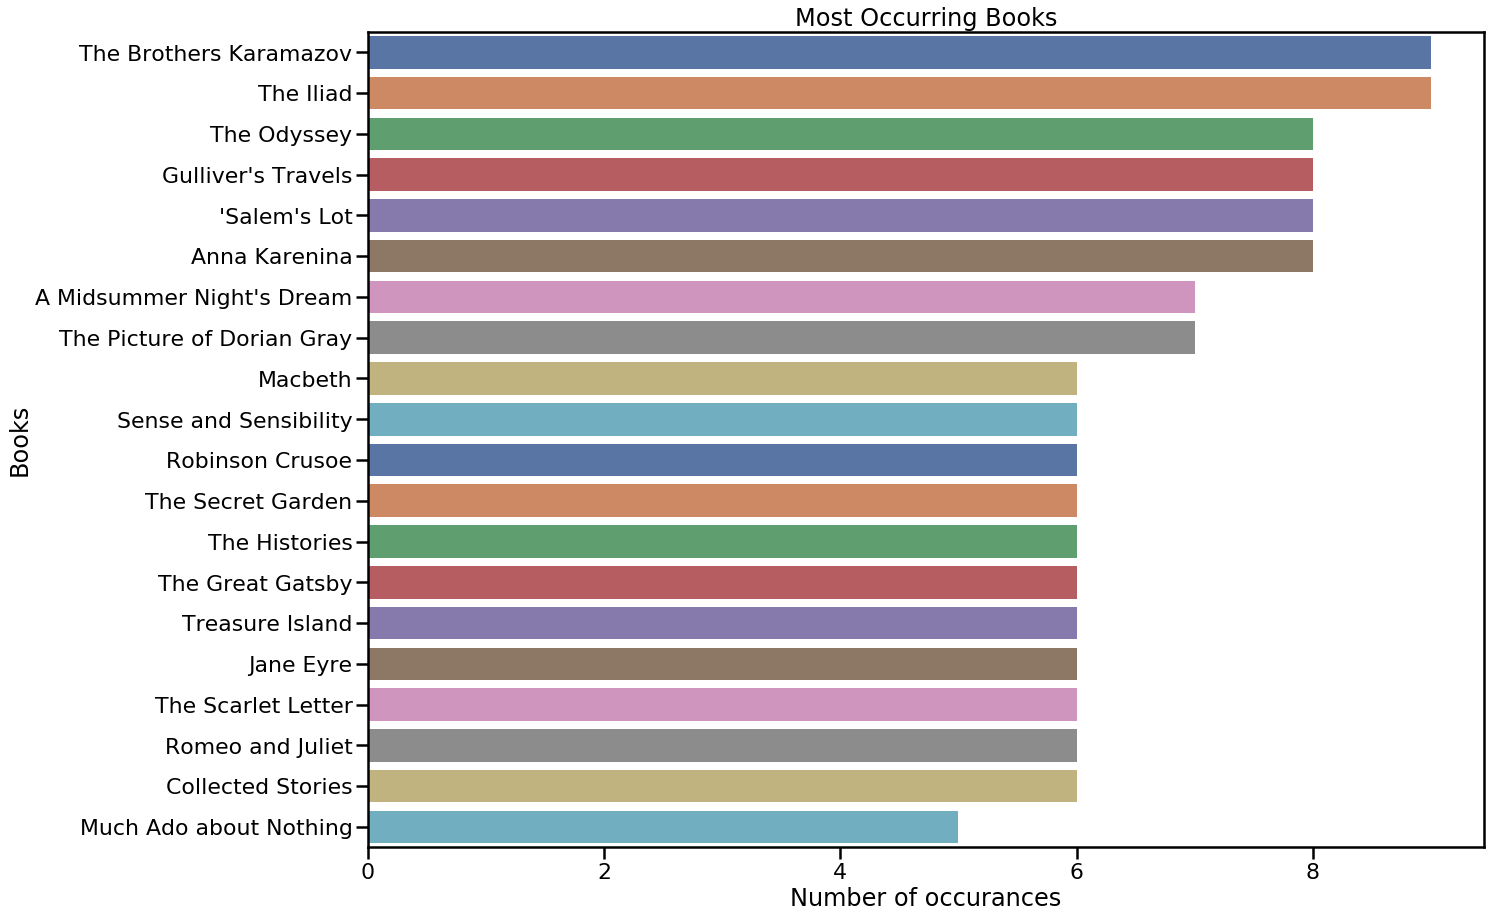

In [21]:
#Looking for the first 20 with most occurences in the list (data set):

sns.set_context('poster')
plt.figure(figsize=(20,15))
books = books_df['title'].value_counts()[:20]
rating = books_df.average_rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

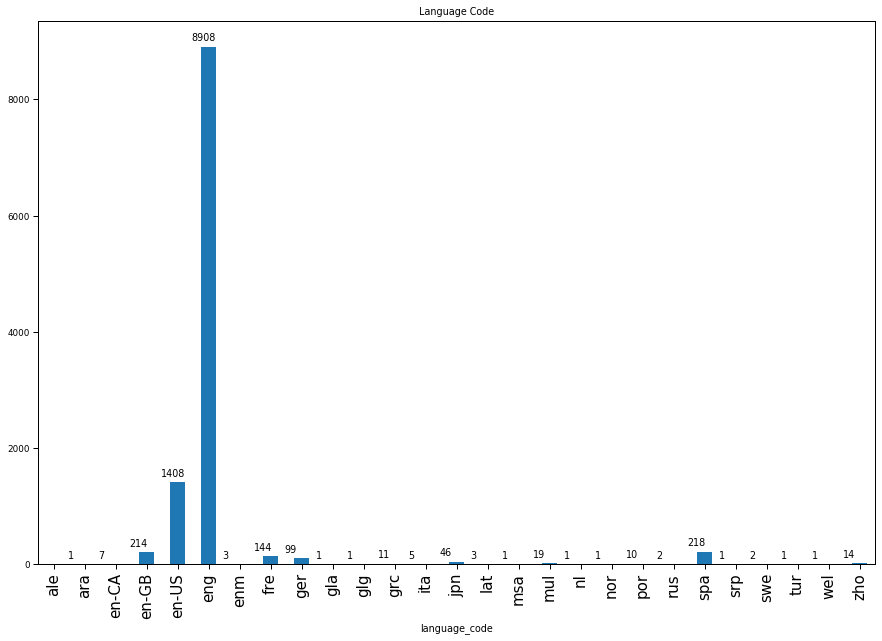

In [22]:
#What is the distribution of books for all languages?
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = books_df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

## Model Building

In [25]:
# Import the model.
from sklearn.neural_network import MLPClassifier

In [ ]:
# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

In [ ]:
mlp.score(X, Y)

In [ ]:
Y.value_counts()/len(Y)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

In [ ]:
# Example of data cleaning
#Remove multiple nationalities, genders, and artists.
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]

# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department